In [2]:
import pandas as pd
import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt
import itertools
from itertools import count


def condition(A):
    sigma=scipy.linalg.svd(A)[1]
    sigmamax=np.max(sigma)
    sigmamin=np.min(sigma)
    if sigmamin==0:
        sigmamin=np.inf
    return sigmamax/sigmamin

A=np.random.random((5,5))
Q=scipy.linalg.qr(A)[0]
condition(Q)




1.0000000000000007

Absolute condition number is:  3.40772411888182e-9
Relative condition number is:  2351970252.18658


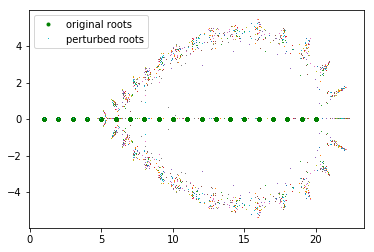

In [3]:
import sympy as sy
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def perturb():
    k=[]
    rel_k=[]
    for i in range(99):
        w_roots=np.arange(1,21)
        x,i=sy.symbols('x i')
        w=sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
        w_coeffs=np.array(w.all_coeffs())
        r=np.random.normal(loc=1, scale=10**-10, size=len(w_coeffs))
        w_coeffs_new=w_coeffs*r
        w_roots_new=np.roots(np.poly1d(w_coeffs_new))
        w_roots=np.sort(w_roots)
        w_roots_new=np.sort(w_roots_new)
        w_roots_real=np.real(w_roots)
        w_roots_imag=np.imag(w_roots)
        w_roots_new_real=np.real(w_roots_new)
        w_roots_new_imag=np.imag(w_roots_new)
        h=w_coeffs-w_coeffs_new
        k.append(scipy.linalg.norm(w_roots_new - w_roots, np.inf)/scipy.linalg.norm(h, np.inf))
        rel_k.append(k[-1]*scipy.linalg.norm(w_coeffs, np.inf)/scipy.linalg.norm(w_roots, np.inf))
        plt.plot(w_roots_real, w_roots_imag, 'g.')
        plt.plot(w_roots_new_real, w_roots_new_imag, ',')
    plt.plot(w_roots_real, w_roots_imag, 'g.', label='original roots')
    plt.plot(w_roots_new_real, w_roots_new_imag, ',', label='perturbed roots')
    k.append(scipy.linalg.norm(w_roots_new - w_roots, np.inf)/scipy.linalg.norm(h, np.inf))
    rel_k.append(k[-1]*scipy.linalg.norm(w_coeffs, np.inf)/scipy.linalg.norm(w_roots, np.inf))
    print('Absolute condition number is: ', np.mean(k))
    print('Relative condition number is: ', np.mean(rel_k))
    plt.legend()
    plt.show()
    
perturb()
        
    
        
        




In [4]:
import sympy as sy
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def condition(A):
    reals=np.random.normal(0, 1e-10, A.shape)
    imags=np.random.normal(0, 1e-10, A.shape)
    H= reals+ 1j*imags
    A_new=A+H
    lambs=scipy.linalg.eigvals(A)
    lambs_new=scipy.linalg.eigvals(A_new)
    numer=scipy.linalg.norm(lambs-lambs_new, 2)
    denom=scipy.linalg.norm(H, 2)
    k=numer/denom
    k_A=k*(scipy.linalg.norm(A,2)/scipy.linalg.norm(lambs,2))
    return k,k_A

A=np.random.random((4,4))
condition(A)


(306671475.62656516, 306347096.8539812)

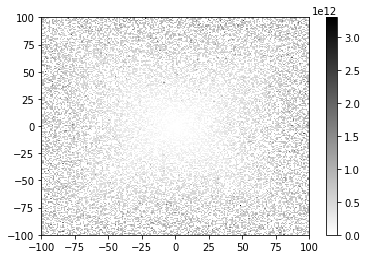

In [5]:
import sympy as sy
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def condition(A):
    reals=np.random.normal(0, 1e-10, A.shape)
    imags=np.random.normal(0, 1e-10, A.shape)
    H= reals+ 1j*imags
    A_new=A+H
    lambs=scipy.linalg.eigvals(A)
    lambs_new=scipy.linalg.eigvals(A_new)
    numer=scipy.linalg.norm(lambs-lambs_new, 2)
    denom=scipy.linalg.norm(H, 2)
    k=numer/denom
    k_A=k*(scipy.linalg.norm(A,2)/scipy.linalg.norm(lambs,2))
    return k,k_A

def color(xmin,xmax, ymin, ymax, res):
    x= np.linspace(xmin, xmax,res)
    y= np.linspace(ymin, ymax, res)
    xx,yy=np.meshgrid(x,y)
    k_A = np.empty((len(x), len(y)))
    for count1,value1 in enumerate(x):
        for count2,value2 in enumerate(y):
            A = np.array([1,value1,value2,1]).reshape(2,2)
            k_A[count1,count2]=condition(A)[1]
    return k_A,xx,yy
k_A,xx,yy=color(-100,100,-100,100,200)
plt.pcolormesh(xx,yy,k_A, cmap='gray_r')
plt.colorbar()
plt.show()
    

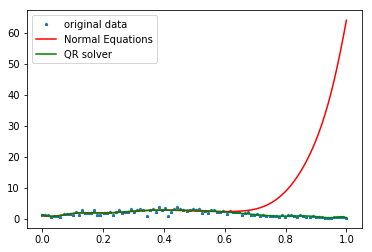

The forward errors are:  152.14373083729365 5.4330612351913444e-08


In [6]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def stability(n):
    xk,yk=np.load('stability_data.npy').T
    A=np.vander(xk, n+1)
    b=yk
    soln1 = scipy.linalg.inv(A.T@A)@A.T@b
    Q,R = scipy.linalg.qr(A, mode='economic')
    A1=R
    b1=Q.T@b
    soln2 = scipy.linalg.solve_triangular(A1,b1)
    f1 = np.poly1d(soln1)
    f2 = np.poly1d(soln2)
    plt.plot(xk,yk, '*', markersize='3',label='original data')
    plt.plot(xk,f1(xk), 'r-', label = 'Normal Equations')
    plt.plot(xk,f2(xk), 'g-', label='QR solver')
    plt.legend()
    plt.show()
    fe1 = scipy.linalg.norm(A@soln1-b)
    fe2 = scipy.linalg.norm(A1@soln2-b1)
    return fe1, fe2
 
fe1, fe2= stability(14)
print('The forward errors are: ', fe1, fe2)

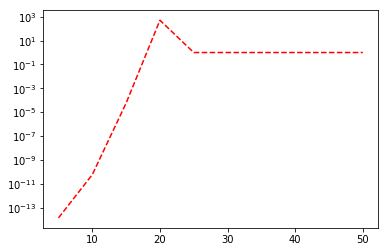

In [7]:
import math
def cat_can():
    nvals = np.arange(5,55,5)
    x = sy.Symbol('x')
    err = []
    for i in nvals:
        con_integral = sy.integrate(x**i * sy.exp(x - 1), (x, 0, 1))
        d_integral = (-1)**i * sy.subfactorial(i) + (-1)**(i + 1) * sy.factorial(i) / math.e
        err.append(abs(d_integral - con_integral) / abs(con_integral))
    plt.plot(nvals, err,'r--')
    plt.yscale('log')
sy.integrate

cat_can()